<a href="https://colab.research.google.com/github/ElhassanGitUub/PyProj/blob/main/Finding_Duplicates.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install pandas
#!pip install matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Load the dataset into a dataframe

In [ ]:
# Load the dataset directly from the URL
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"
df = pd.read_csv(file_path)      #Load the data into a pandas dataframe

# Display the first few rows
print(df.head())

   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                                NaN   
4                                 

## Identify and Analyze Duplicates

 **Task 1: Identify Duplicate**
Count the number of duplicate rows in the dataset.
Display the first few duplicate rows to understand their structure.

In [ ]:
duplicate_count = df.duplicated().sum()

# Extract duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Display results
print(f"Number of duplicate rows: {duplicate_count}")
print("First few duplicate rows:")
print(duplicates.head())

Number of duplicate rows: 20
First few duplicate rows:
   ResponseId                      MainBranch                 Age  \
0           1  I am a developer by profession  Under 18 years old   
1           2  I am a developer by profession     35-44 years old   
2           3  I am a developer by profession     45-54 years old   
3           4           I am learning to code     18-24 years old   
4           5  I am a developer by profession     18-24 years old   

            Employment RemoteWork   Check  \
0  Employed, full-time     Remote  Apples   
1  Employed, full-time     Remote  Apples   
2  Employed, full-time     Remote  Apples   
3   Student, full-time        NaN  Apples   
4   Student, full-time        NaN  Apples   

                                    CodingActivities  \
0                                              Hobby   
1  Hobby;Contribute to open-source projects;Other...   
2  Hobby;Contribute to open-source projects;Other...   
3                                  

**Task 2: Analyze Characteristics of Duplicates**
Identify duplicate rows based on selected columns such as MainBranch, Employment, and RemoteWork. Analyse which columns frequently contain identical values within these duplicate rows.
Analyse the characteristics of rows that are duplicates based on a subset of columns, such as MainBranch, Employment, and RemoteWork. Determine which columns frequently have identical values across these rows.

In [ ]:
key_columns = ["MainBranch", "Employment", "RemoteWork"]
duplicates = df[df.duplicated(subset=key_columns, keep=False)]

# Check consistency across other columns
identical_counts = (duplicates.groupby(key_columns).nunique() == 1).sum()

# Sort by frequency of identical values
consistent_columns = identical_counts.sort_values(ascending=False)

# Display results
print("Columns that frequently contain identical values within duplicate rows:")
print(consistent_columns)

Columns that frequently contain identical values within duplicate rows:
Check                    319
ICorPM                    97
AIThreat                  88
SOAccount                 85
AINextLess integrated     76
                        ... 
TechEndorse                8
YearsCodePro               8
BuyNewTool                 7
CodingActivities           1
ResponseId                 0
Length: 111, dtype: int64


**Task 3: Visualize Duplicates Distribution**
Create visualizations to show the distribution of duplicates across different categories.
Use bar charts or pie charts to represent the distribution of duplicates by Country and Employment.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<ipython-input-16-dfcb6f0f818e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], ax=axes[0], palette="viridis")
<ipython-input-16-dfcb6f0f818e>:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")


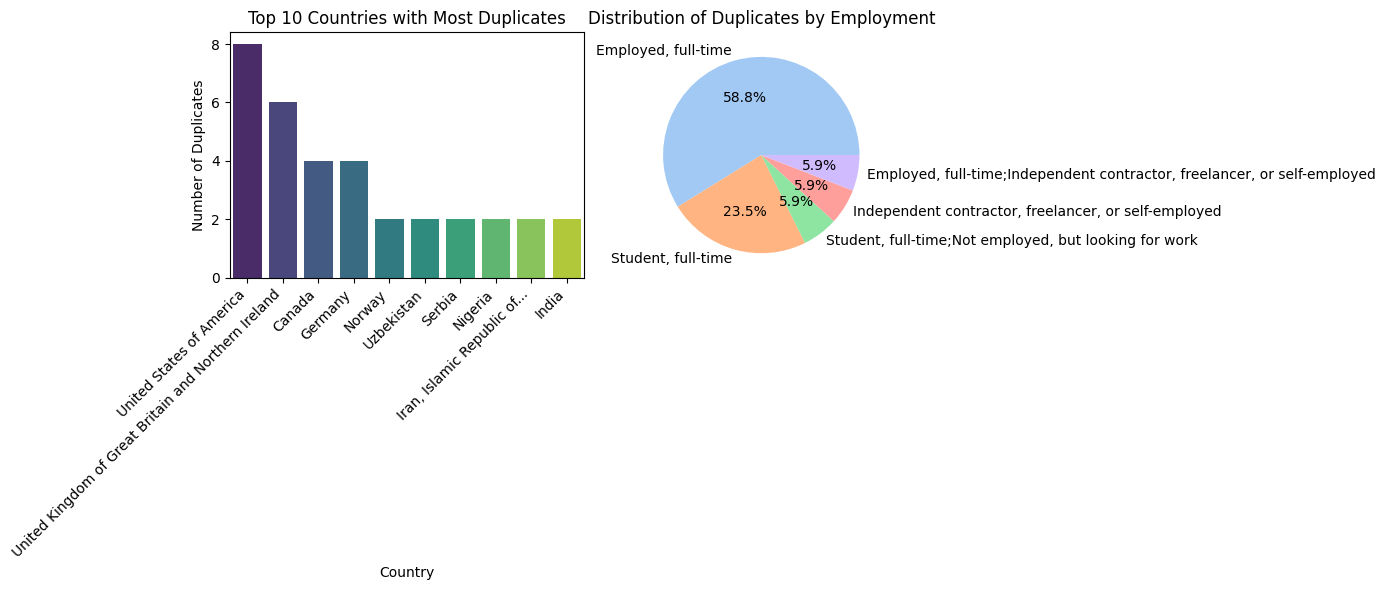

In [ ]:

# Identify duplicate rows
duplicates = df[df.duplicated(keep=False)]

# Count duplicates by Country and Employment
country_counts = duplicates["Country"].value_counts()
employment_counts = duplicates["Employment"].value_counts()

# Set up plots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Bar chart for duplicates by Country
sns.barplot(x=country_counts.index[:10], y=country_counts.values[:10], ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Countries with Most Duplicates")
axes[0].set_ylabel("Number of Duplicates")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha="right")

# Pie chart for duplicates by Employment
axes[1].pie(employment_counts[:5], labels=employment_counts.index[:5], autopct="%1.1f%%", colors=sns.color_palette("pastel"))
axes[1].set_title("Distribution of Duplicates by Employment")

# Show plots
plt.tight_layout()
plt.show()


**Task 4: Strategic Removal of Duplicates**
Decide which columns are critical for defining uniqueness in the dataset.
Remove duplicates based on a subset of columns if complete row duplication is not a good criterion.

In [ ]:

# Define key columns for uniqueness
key_columns = ["MainBranch", "Employment", "RemoteWork"]

# Identify duplicates based on key columns
duplicates = df[df.duplicated(subset=key_columns, keep=False)]
print(f"Number of duplicates based on {key_columns}: {duplicates.shape[0]}")

# Remove duplicates while keeping the first occurrence
df_cleaned = df.drop_duplicates(subset=key_columns)

# Save cleaned dataset
df_cleaned.to_csv("cleaned_data.csv", index=False)

print("Duplicate removal complete. Cleaned dataset saved.")


Number of duplicates based on ['MainBranch', 'Employment', 'RemoteWork']: 65290
Duplicate removal complete. Cleaned dataset saved.


**Task 5: Documentation**
1. Document the process of identifying and removing duplicates.
2. Explain the reasoning behind selecting specific columns for identifying and removing duplicates.


Here’s a structured documentation for **identifying and removing duplicates** in your dataset.
---
# **Duplicate Data Handling Documentation**
## **1. Identifying and Removing Duplicates**
### **Step 1: Load the Dataset**  
First, load the dataset using **Pandas**.
```python
import pandas as pd
# Load dataset
df = pd.read_csv("your_data.csv")
```
### **Step 2: Identify Duplicate Rows**  
Use the `.duplicated()` method to count duplicate rows:
```python
# Count duplicate rows
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
```
To inspect the first few duplicate rows:
```python
# Display duplicate rows
duplicates = df[df.duplicated(keep=False)]
print(duplicates.head())
```
### **Step 3: Identify Duplicates Based on Specific Columns**  
In some cases, duplicates should be identified based on a subset of key columns (e.g., `MainBranch`, `Employment`, `RemoteWork`).
```python
key_columns = ["MainBranch", "Employment", "RemoteWork"]
duplicates_subset = df[df.duplicated(subset=key_columns, keep=False)]
print(duplicates_subset.head())
```
### **Step 4: Remove Duplicates**  
To remove all duplicate rows while keeping the first occurrence:
```python
df_cleaned = df.drop_duplicates()
```
To remove duplicates based on key columns:
```python
df_cleaned = df.drop_duplicates(subset=key_columns)
```
### **Step 5: Save the Cleaned Dataset**  
```python
df_cleaned.to_csv("cleaned_data.csv", index=False)
```
---
## **2. Reasoning Behind Selecting Specific Columns**
Choosing the right columns for duplicate detection depends on the dataset structure and the goal of cleaning. Here’s why we selected specific columns:
- **`MainBranch`**: Identifies the primary role of a respondent in the dataset (e.g., developer, researcher).
- **`Employment`**: Differentiates between full-time, part-time, or self-employed individuals.
- **`RemoteWork`**: Indicates whether the respondent works remotely, adding context to employment patterns.
### **Why Not Use All Columns?**
- Some columns (e.g., `Respondent ID`, `Timestamp`) are unique identifiers and should not be considered for duplicates.
- Certain fields like `Salary` or `Age` might vary slightly for the same individual but should not trigger duplication.
---
